<a href="https://colab.research.google.com/github/arifnayan2861/DA/blob/main/EDA_on_Video_game_sales_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performing **EDA** on a **video games sales** dataset, deducting conclusions from it and finally visualizing important data

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Dataset Overview**
Motivated by Gregory Smith's web scrape of VGChartz Video Games Sales, this data set simply extends the number of variables with another web scrape from Metacritic. Unfortunately, there are missing observations as Metacritic only covers a subset of the platforms. Also, a game may not have all the observations of the additional variables discussed below. Complete cases are ~ 6,900. Find the dataset [here](https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset?select=Video_Games_Sales_as_at_22_Dec_2016.csv)

---

In this section, we load the dataset and explore its structure. We check for missing values, duplicate records, and gain insights into the dataset’s shape and columns. This helps us understand the initial quality of the data.

In [ ]:
df = pd.read_csv("/content/Video_Games_Sales_as_at_22_Dec_2016.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## **Exploring the dataset**
Exploring the dataset includes checking the type of data the dataset contains, checking for missing or duplicated values etc.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [ ]:
#checking for null values
df.isnull().sum()

,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [ ]:
#checking for duplicates
df.duplicated().sum()

0

## **Exploratory Data Analysis(EDA)**

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.00,51,8.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.97,24,7.5,109,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.00,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.00,73,8.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.97,32,7.5,321,NaN,NaN


In [ ]:
#dropping missing values from 'Name' & 'Genre' column since there are only 2 records
df.dropna(subset=['Name', 'Genre'], inplace=True)
df.isnull().sum()

,0
Name,0
Platform,0
Year_of_Release,269
Genre,0
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [ ]:
#filling the null values in the 'Publisher' column with the mode values since
#it's a categorical data. Another way could to be replace every value
#manually. But for a larger number of missing values, this would not work.
df['Publisher'] = df['Publisher'].fillna(df['Publisher'].mode()[0])

In [ ]:
#filling the null values in the 'Year_of_Release' column with the median values
#since it's a numerical data. Another way could to be replace every value
#manually. But for a larger number of missing values, this would not work.
df['Year_of_Release'] = df['Year_of_Release'].fillna(df['Year_of_Release'].median())
df['Year_of_Release'] = df['Year_of_Release'].astype(int) #changing the type into integer

In [ ]:
#filling the null values in the 'Critic_Score' column with the mean values
#since it's a numerical data.
df['Critic_Score'] = df['Critic_Score'].fillna(df['Critic_Score'].mean())
df['Critic_Score'] = df['Critic_Score'].round(2) #rounding the values for better calculation

In [ ]:
#filling the null values in the 'User_Score' column with the median values
#since it's a numerical data.
df['User_Score'] = df['User_Score'].fillna(df['User_Score'].median())
df['User_Score'] = df['User_Score'].round(2) #rounding the values for better calculation

In [ ]:
#filling the null values in the 'Critic_Count' & 'User_Count' column with the
#grouped values by genre, since game popularity varies by genre or platform.
df['Critic_Count'] = df.groupby('Genre')['Critic_Count'].transform(lambda x : x.fillna(x.mean()))
df['User_Count'] = df.groupby('Genre')['User_Count'].transform(lambda x : x.fillna(x.mean()))

In [ ]:
#Rounding the values of 'Critic_Count' & 'User_Count' and changing the data type
df['Critic_Count'] = df['Critic_Count'].round()
df['User_Count'] = df['User_Count'].round()
df['Critic_Count'] = df['Critic_Count'].astype(int) #changing the type into integer
df['User_Count'] = df['User_Count'].astype(int) #changing the type into integer
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.00,51,8.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.97,24,7.5,109,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.00,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.00,73,8.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.97,32,7.5,321,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16717 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16717 non-null  int64  
 3   Genre            16717 non-null  object 
 4   Publisher        16717 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Critic_Score     16717 non-null  float64
 11  Critic_Count     16717 non-null  int64  
 12  User_Score       16717 non-null  float64
 13  User_Count       16717 non-null  int64  
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 2.2+ MB


## **Visualizing the data**

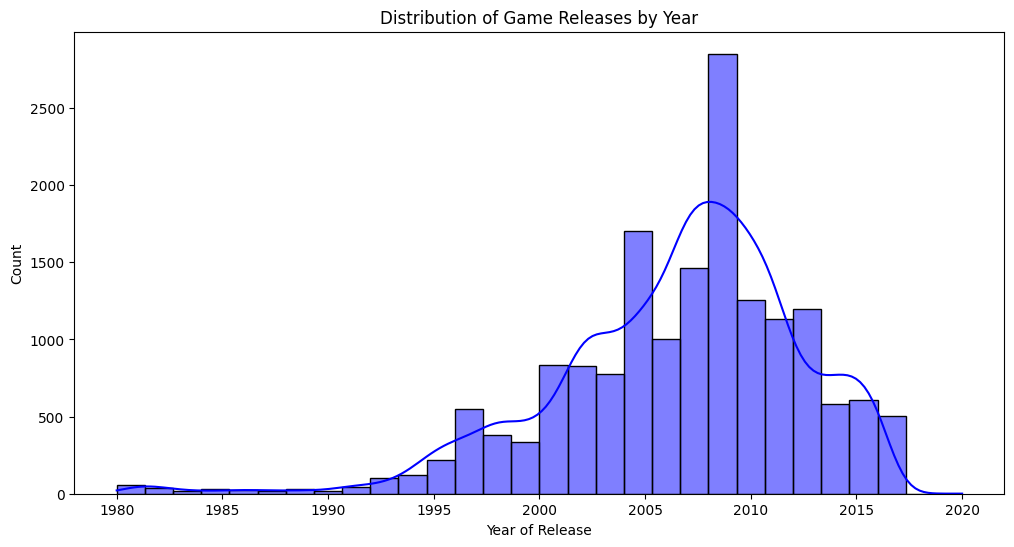

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Year_of_Release'], bins=30, kde=True, color='blue')
plt.title("Distribution of Game Releases by Year")
plt.xlabel("Year of Release")
plt.ylabel("Count")
plt.show()

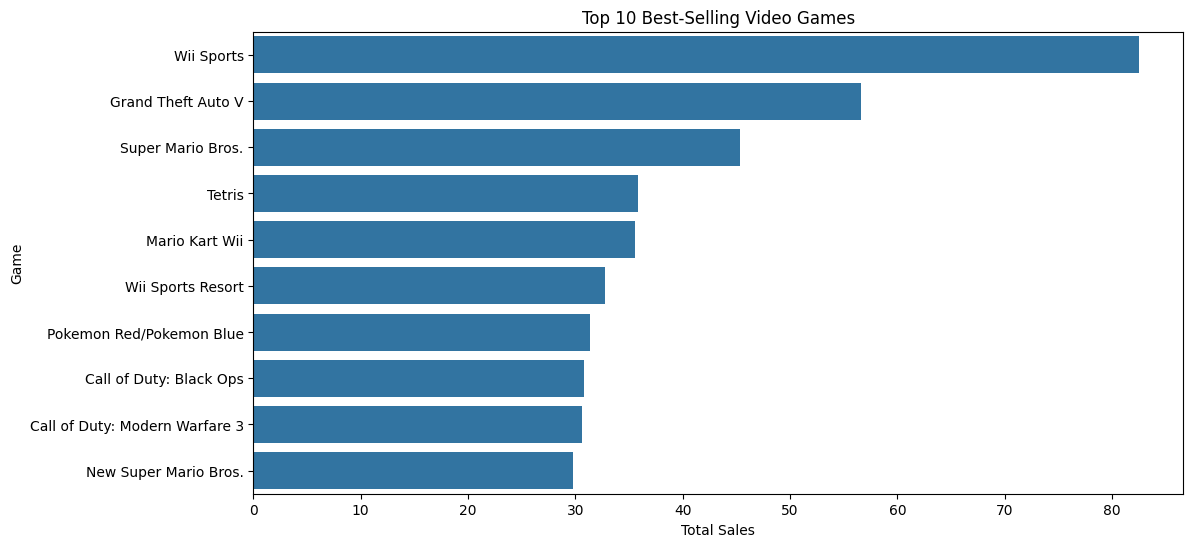

In [ ]:
top_games = df[['Name', 'Global_Sales']].groupby('Name').sum().sort_values(by='Global_Sales', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_games['Global_Sales'], y=top_games.index)
plt.title("Top 10 Best-Selling Video Games")
plt.xlabel("Total Sales")
plt.ylabel("Game")
plt.show()

<ipython-input-34-b4f1475428d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales['Global_Sales'], y=genre_sales.index, palette='viridis')


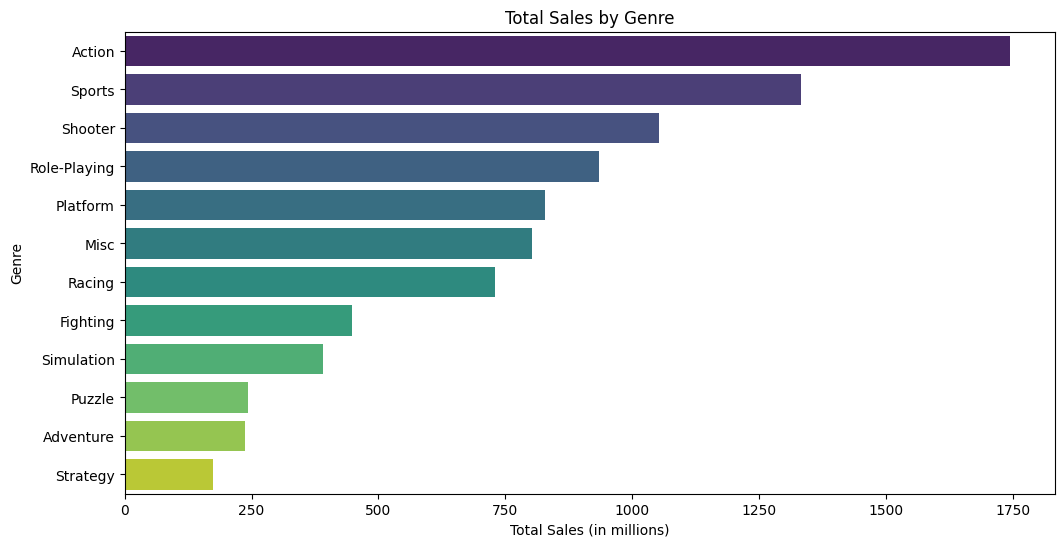

In [ ]:
genre_sales = df[['Genre', 'Global_Sales']].groupby('Genre').sum().sort_values(by='Global_Sales', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales['Global_Sales'], y=genre_sales.index, palette='viridis')
plt.title("Total Sales by Genre")
plt.xlabel("Total Sales (in millions)")
plt.ylabel("Genre")
plt.show()

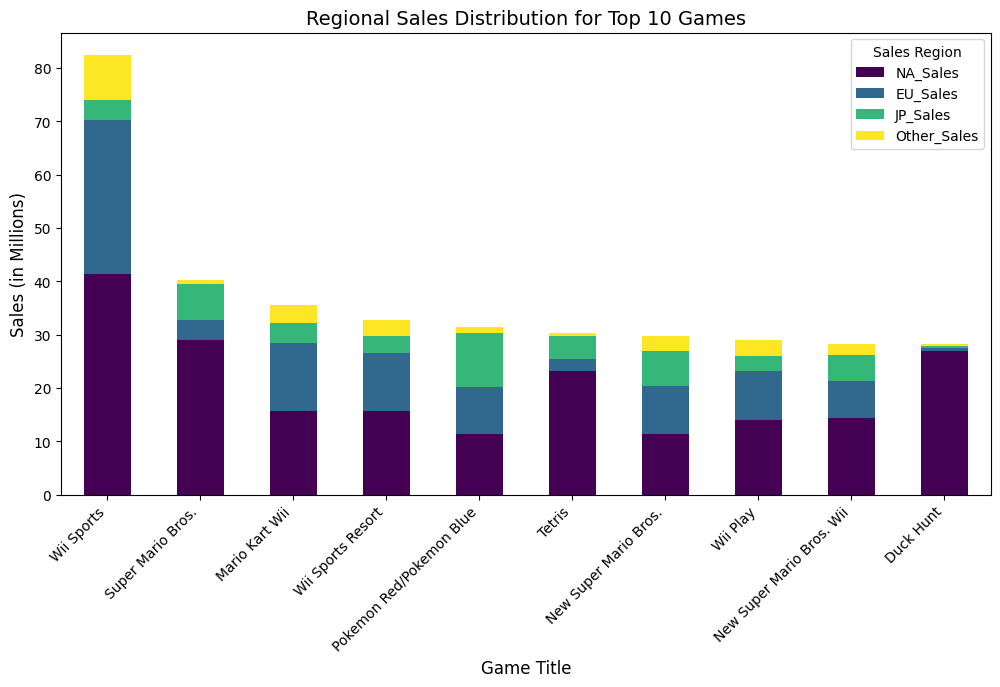

In [ ]:
# Select the top 10 games by Global Sales for better visualization
top_games = df.nlargest(10, 'Global_Sales')

# Plot stacked bar chart
top_games.set_index('Name')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].plot(
    kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Labels & title
plt.title("Regional Sales Distribution for Top 10 Games", fontsize=14)
plt.xlabel("Game Title", fontsize=12)
plt.ylabel("Sales (in Millions)", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.legend(title="Sales Region")
plt.show()
